<a href="https://colab.research.google.com/github/DaniloDantas/DaniloDantas/blob/master/ProjetoETL_Acidentes_Aeronauticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **MINI PROJETO DE ETL SOBRE ACIDENTES AERONÁUTICOS.**

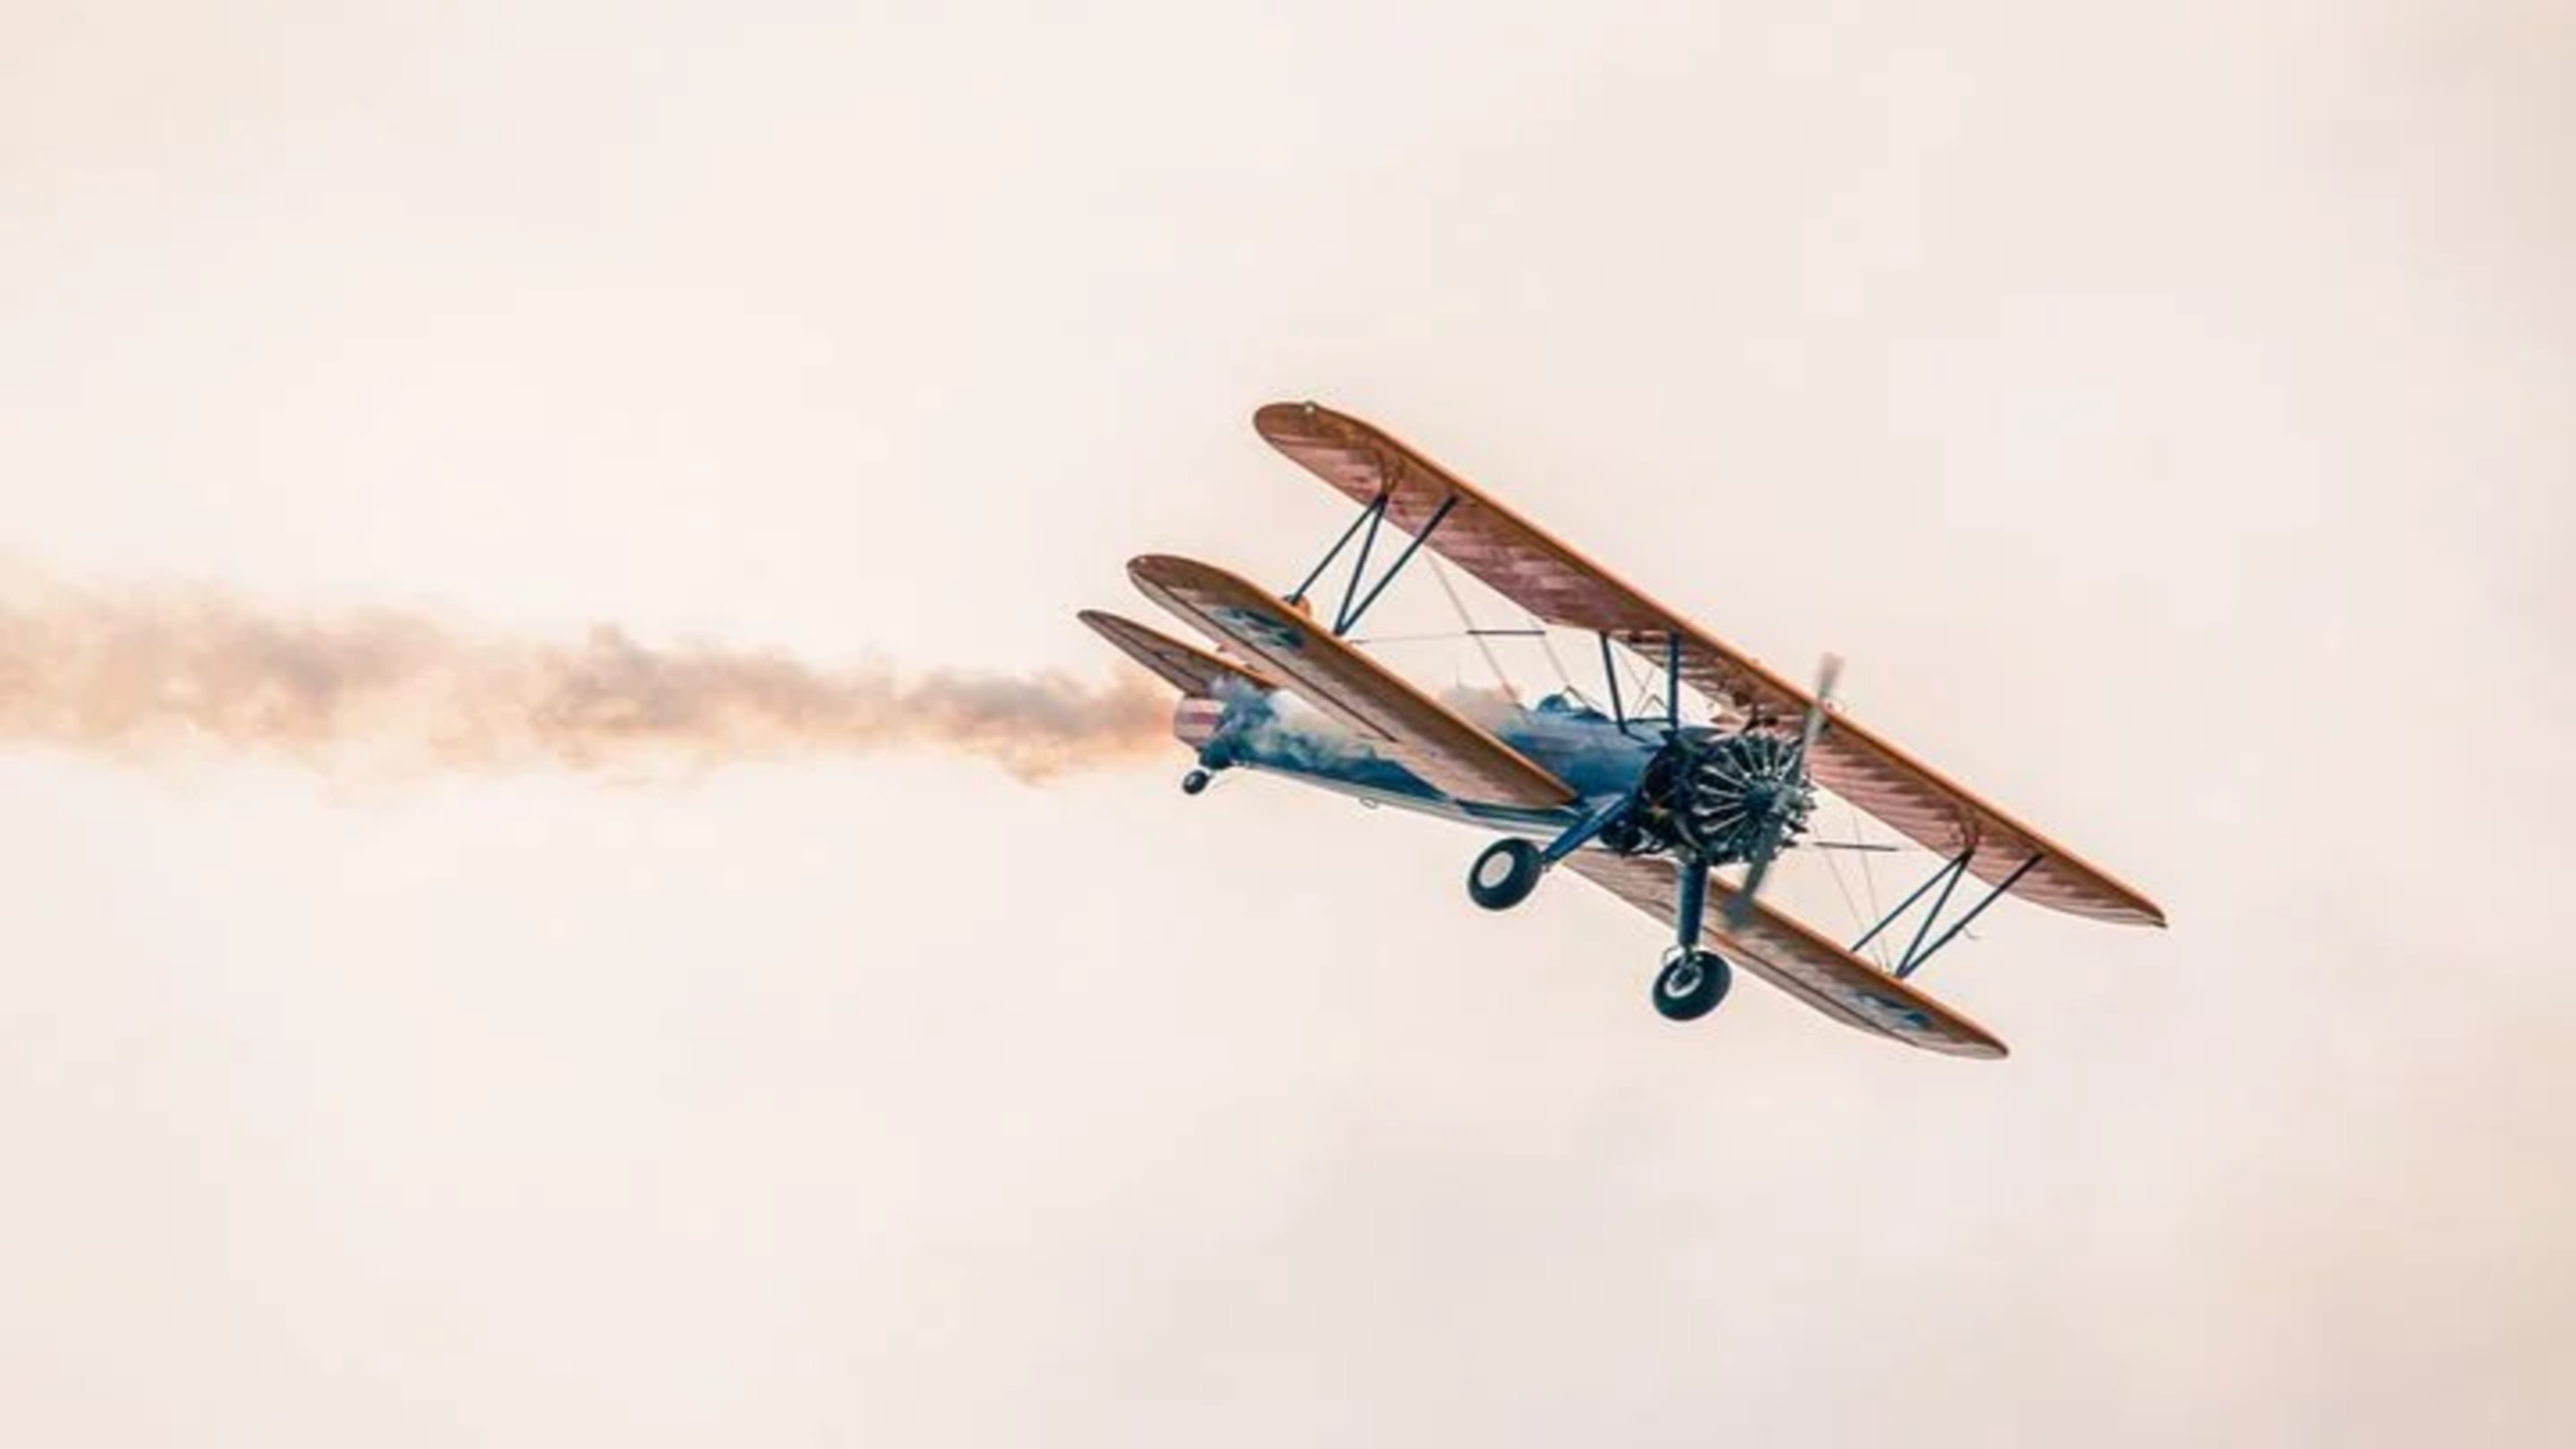

Os dados desse projeto foram extraídos da base de dados abertos do Cenipa: https://www2.fab.mil.br/cenipa/.



---



### **Cenário:**

**O medo de voar** é uma fobia que afeta milhares de pessoa no
mundo inteiro. Segundo o IBOPE, 3 em cada 4 brasileiros diz ter medo de voar.

Porém, existe várias entidades responsáveis por assegurar a total segurança do transporte aéreo. De modo que, segundo a revista americana *Condé Nast Traveler* este é o 2º meio de transporte mais seguro do mundo. 

Dentre os órgãos responsáveis por tal segurança, encontra-se o **CENIPA.**

Nesse projeto, é com base nos dados apresentados pelo Cenipa que faremos a nossa **análise exploratória.**


---



O **CENIPA** é um órgão responsável pela investigação de acidentes aeronáuticos. 

A investigação começa no local do acidente e só termina com a **divulgação da recomendação** dos analista para toda a comunidade.
Tão órgão regulamentador tem subdivisões espalhadas em 7 regiões do Brasil.

O intuito da investigação pelo CENIPA é **entender meios para prevenção** de outros acidentes como o ocorrido, identificar os fatores que contribuiram para aquela ocorrência, e a partir desses fatores colocar alguns bloqueios - que são **as recomendações de segurança**. Visando a mitigação dos fatores de riscos.

Buscaremos entender nesse projeto a quantidade de **ocorrências** (subentende-se, acidentes e/ou incidentes) por cidade e estado, qual a maior classificação da ocorrência - se a maioria é apenas incidente ou acidente, e em quais anos tiveram aumento ou diminuição da mesma.

Com esse objetivo, teremos claro quais cidades precisam de uma atenção maior e/ou mais treinamento, em qual ano teve o menor número de casos e qual o estado que teve o maior número de recomendação.


---



O objetivo desse projeto é por em prática alguns conceitos sobre ETL usando a biblioteca Pandas do Python como desafio do Bootcamp do Banco Carrefour apresentado pela plataforma [Digital Inovation One](https://digitalinnovation.one/).

Dito isto, além das etapas de Extração, Tratamento e Carregamento, faremos uma análise exploratória para entender alguns eventos com base nas seguintes perguntas:

**1. Qual o número de ocorrencias por ano?**

**2. Qual o percentual de incidentes, acidentes e incidentes graves?**

**3.  Qual o número de recomendações por estado?**

**4. Qual o número de ocorrências por estados?**

**5. Quais as principais cidades que tiveram mais ocorrencias?** 



## **Preparando o ambiente**

### **Dicionário do dataset:**

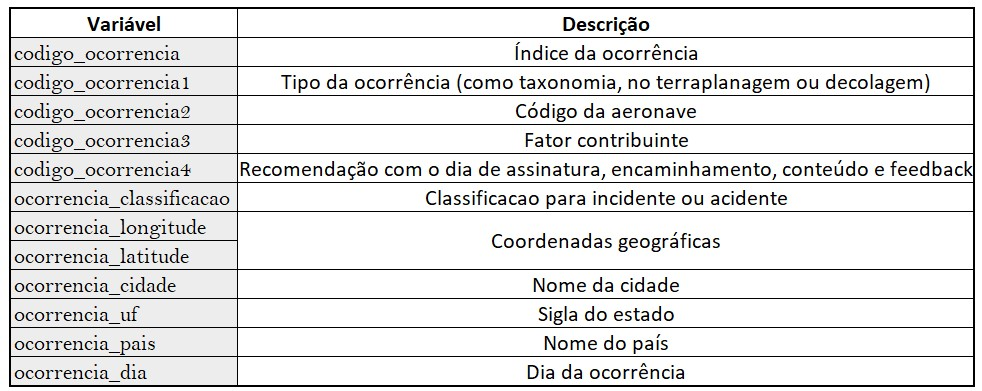

*Para maior entendimento das variáves, deve-se acessar o site da fonte dos dados.*

### **Importação dos Pacotes**

In [ ]:
import pandas as pd #Pacote para análise de dados
import numpy as np  #Pacote para análise de dados
import matplotlib.pyplot as plt # Pacote para visualização de dados
from matplotlib import cm       # Pacote para visualização de dados

### **Carregamento dos dados**

In [ ]:
from google.colab import drive #Conectando o GC ao drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/ocorrencia_aeronautica.csv', sep = ';', dayfirst=True)
# Fazendo o upload dos dados os dados

### **Limpeza dos dados**

In [ ]:
dados.head() # Visualizando os 5 primeiros registros

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,****,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,****,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [ ]:
dados.shape #Visualizando o conteúdo da base de dados

(5752, 22)

* Logo no início podemos observar que a base de dados tem valores 
nulos e registros com caracteres especiais que necessitarão ser tratados;

* A base de dados tem 22 variáveis e cerca de 5700 registros, logo podemos estimar que tem aproximadamente 125 mil entradas

In [ ]:
dados.dtypes #Conhecendo o tipo dos dados

codigo_ocorrencia                  int64
codigo_ocorrencia1                 int64
codigo_ocorrencia2                 int64
codigo_ocorrencia3                 int64
codigo_ocorrencia4                 int64
ocorrencia_classificacao          object
ocorrencia_latitude               object
ocorrencia_longitude              object
ocorrencia_cidade                 object
ocorrencia_uf                     object
ocorrencia_pais                   object
ocorrencia_aerodromo              object
ocorrencia_dia                    object
ocorrencia_hora                   object
investigacao_aeronave_liberada    object
investigacao_status               object
divulgacao_relatorio_numero       object
divulgacao_relatorio_publicado    object
divulgacao_dia_publicacao         object
total_recomendacoes                int64
total_aeronaves_envolvidas         int64
ocorrencia_saida_pista            object
dtype: object

* Inicialmente podemos observar que a coluna dia e hora estão como string. Precisaremos alterar para o formato data e hora respectivamente.

In [ ]:
dados['ocorrencia_dia'] = pd.to_datetime(dados['ocorrencia_dia'], dayfirst=True) 
#Convertendo a coluna dia para o formato data.

* Para a nossa análise não necessitaremos de todas as colunas. Por isso faremos a exclusão das variáveis que não serão utéis nesse momento 

In [ ]:
dados = dados.drop(columns = ['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4','ocorrencia_latitude','ocorrencia_longitude',
                                        'ocorrencia_pais','investigacao_aeronave_liberada','investigacao_status','divulgacao_relatorio_numero',
                                        'divulgacao_dia_publicacao','total_aeronaves_envolvidas','ocorrencia_saida_pista',
                                        'divulgacao_relatorio_publicado'])
# Deletando as colunas que não iremos usar.

In [ ]:
dados.head() # Visualizando os 5 primeiros registros

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0


In [ ]:
dados.shape # Verificando o conteúdo

(5752, 8)

* Reduzimos as variáveis de 22 para 8, logo de 125.000 entradas, analisaremos apenas 46.000.

In [ ]:
dados.dtypes # Verificando o tipo dos dados

codigo_ocorrencia                    int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

In [ ]:
dados.replace(['**','****','####','###!','*****'], pd.NA, inplace=True)
# Eliminando os caracteres especiais

* Substituimos os caracteres especiais por NA (*Not Applicable*) do pacote pandas

In [ ]:
dados.isna().sum() # Calculando os valores nulos

codigo_ocorrencia              0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  0
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

* Notamos que existe 1 registro com valor nulo na varíavel hora, porém é a coluna aerodromo com maior número de valores nulos.
Por enquanto isso não será um problema.

## **Análise Exploratória**

### **1. Número de ocorrências por ano.**

In [ ]:
listaAno = dados.loc[:,'ocorrencia_dia']
listaAno # Analisando as entradas da variável data

0      2010-01-03
1      2010-01-03
2      2010-01-03
3      2010-01-04
4      2010-01-05
          ...    
5747   2020-12-29
5748   2020-12-30
5749   2020-12-30
5750   2020-12-31
5751   2020-12-31
Name: ocorrencia_dia, Length: 5752, dtype: datetime64[ns]

In [ ]:
listaAno.min() #Verificando o menor registro de data

Timestamp('2010-01-03 00:00:00')

In [ ]:
listaAno.max() #verificando o maior registro de data

Timestamp('2020-12-31 00:00:00')

* Chegamos a conclusão que os dados são de 03.01.2010 a 31.12.2020


---

* Agora vamos filtrar as ocorrências por ano (de 2010 a 2020) para saber o ano que teve a maior e menor ocorrências de acidentes aéreos.


In [ ]:
filtro2010 = dados.ocorrencia_dia.dt.year == 2010
filtro2010.sum() #Verificando as ocorrências por ano;

552

In [ ]:
filtro2011 = dados.ocorrencia_dia.dt.year == 2011
filtro2011.sum() #Verificando as ocorrências por ano;

576

In [ ]:
filtro2012 = dados.ocorrencia_dia.dt.year == 2012
filtro2012.sum() #Verificando as ocorrências por ano;

647

In [ ]:
filtro2013 = dados.ocorrencia_dia.dt.year == 2013
filtro2013.sum() #Verificando as ocorrências por ano;

654

In [ ]:
filtro2014 = dados.ocorrencia_dia.dt.year == 2014
filtro2014.sum() #Verificando as ocorrências por ano;

567

In [ ]:
filtro2015 = dados.ocorrencia_dia.dt.year == 2015
filtro2015.sum() #Verificando as ocorrências por ano;

471

In [ ]:
filtro2016 = dados.ocorrencia_dia.dt.year == 2016
filtro2016.sum() #Verificando as ocorrências por ano;

403

In [ ]:
filtro2017 = dados.ocorrencia_dia.dt.year == 2017
filtro2017.sum() #Verificando as ocorrências por ano;

432

In [ ]:
filtro2018 = dados.ocorrencia_dia.dt.year == 2018
filtro2018.sum() #Verificando as ocorrências por ano;

444

In [ ]:
filtro2019 = dados.ocorrencia_dia.dt.year == 2019
filtro2019.sum() #Verificando as ocorrências por ano;

496

In [ ]:
filtro2020 = dados.ocorrencia_dia.dt.year == 2020
filtro2020.sum() #Verificando as ocorrências por ano;

510

In [ ]:
indice = [i for i in range(2010, 2021)] # Salvando os anos em uma lista;

In [ ]:
valores = [filtro2010.sum(),filtro2011.sum(),filtro2012.sum(),
           filtro2013.sum(),filtro2014.sum(),filtro2015.sum(),
           filtro2016.sum(),filtro2017.sum(),filtro2018.sum(),
           filtro2019.sum(),filtro2020.sum()]
# Salvando a soma das ocorrências em uma lista

In [ ]:
valores # Lista da soma de ocorrências;

[552, 576, 647, 654, 567, 471, 403, 432, 444, 496, 510]

In [ ]:
indice # Lista dos anos de registros;

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [ ]:
tabela = pd.DataFrame() # Criando um daframe para armazenar as listas - indices e valores

In [ ]:
tabela['Ano'] = indice          # Criando as colunas do dataframe
tabela['Ocorrência'] = valores

In [ ]:
tabela # Imprimindo o dataframe

,Ano,Ocorrência
0,2010,552
1,2011,576
2,2012,647
3,2013,654
4,2014,567
5,2015,471
6,2016,403
7,2017,432
8,2018,444
9,2019,496


### Resposta à pergunta 01:

<function matplotlib.pyplot.show>

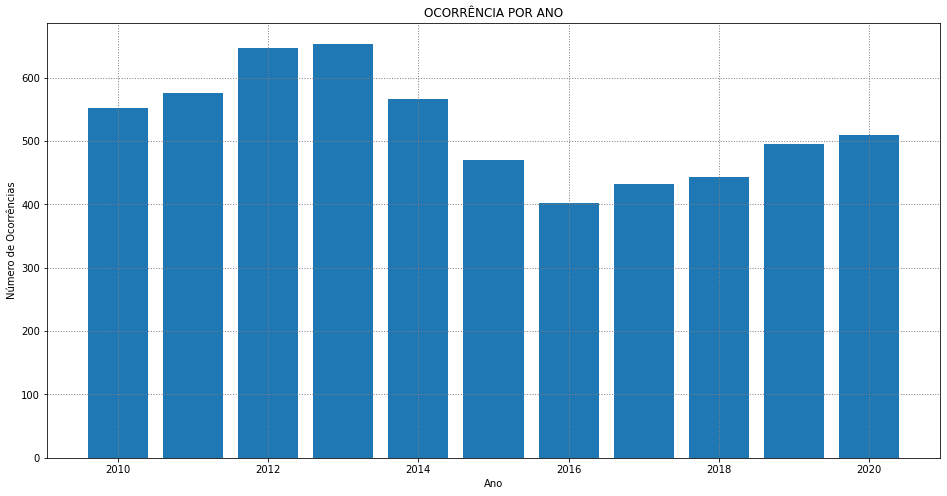

<Figure size 1152x576 with 0 Axes>

In [ ]:
# Visualizando os dados;

plt.title('OCORRÊNCIA POR ANO')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')

plt.bar(indice,valores)
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.rcParams["figure.figsize"] = (16,8)
plt.figure()
plt.show

### **2. Percentual de ocorrências por classificação.**

In [ ]:
dados # Imprimindo as primeiras e últimas linhas do dataframe principal;

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


In [ ]:
#Filtrando o df por classificação;
classe = dados.ocorrencia_classificacao == 'INCIDENTE' 
dados.loc[classe]


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
5,39807,INCIDENTE,SALVADOR,BA,<NA>,2010-01-06,17:53:00,0
...,...,...,...,...,...,...,...,...
5738,79787,INCIDENTE,FORTALEZA,CE,SBFZ,2020-12-23,18:30:00,0
5742,79800,INCIDENTE,SÃO PAULO,SP,SBMT,2020-12-28,10:15:00,0
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0


In [ ]:
classe.sum() #Somando as ocorrências;

3171

In [ ]:
#Filtrando o df por classificação e somando as ocorrências;
classe1 = dados.ocorrencia_classificacao == 'INCIDENTE GRAVE'
classe1.sum()

737

In [ ]:
#Filtrando o df por classificação e somando as ocorrências;
classe2 = dados.ocorrencia_classificacao == 'ACIDENTE'
classe2.sum()

1844

In [ ]:
#Analisando os registros de classficação;
dados.ocorrencia_classificacao

0             INCIDENTE
1             INCIDENTE
2             INCIDENTE
3              ACIDENTE
4             INCIDENTE
             ...       
5747          INCIDENTE
5748    INCIDENTE GRAVE
5749          INCIDENTE
5750    INCIDENTE GRAVE
5751          INCIDENTE
Name: ocorrencia_classificacao, Length: 5752, dtype: object

In [ ]:
#Colocando as classificações como índice;
indiceClasse = ['INCIDENTE','INCIDENTE GRAVE','ACIDENTE']

In [ ]:
#Atribuindo o resultado das somas a uma variável local;
valoresClasse = [classe.sum(),classe1.sum(),classe2.sum()]

In [ ]:
# Imprimindo na tela
valoresClasse

[3171, 737, 1844]

In [ ]:
#Criando um dataframe para armazenar o resultado acima;
resultado = pd.DataFrame()

In [ ]:
# Criando uma coluna para a classificação;
resultado['Classificação'] = indiceClasse

In [ ]:
# Criando uma coluna para a soma das classificações;
resultado['Nº Ocorrências'] = valoresClasse

In [ ]:
#Ordenando o df por ordem decrescente;
resultado = resultado.sort_values(by = 'Nº Ocorrências', ascending = False)

In [ ]:
# Criando uma coluna para calcular o percentual;
resultado["Percentual"] = (resultado['Nº Ocorrências'] / resultado['Nº Ocorrências'].sum())*100

In [ ]:
resultado

,Classificação,Nº Ocorrências,Percentual
0,INCIDENTE,3171,55.128651
2,ACIDENTE,1844,32.058414
1,INCIDENTE GRAVE,737,12.812935


In [ ]:
# Criando um rótulo para o gráfico de pizza;
labels = [str(resultado['Classificação'][i]) + ' ' + '['+ str(round(resultado['Percentual'][i],2)) + '%' + ']' for i in resultado.index]

### Resposta da pergunta 02:

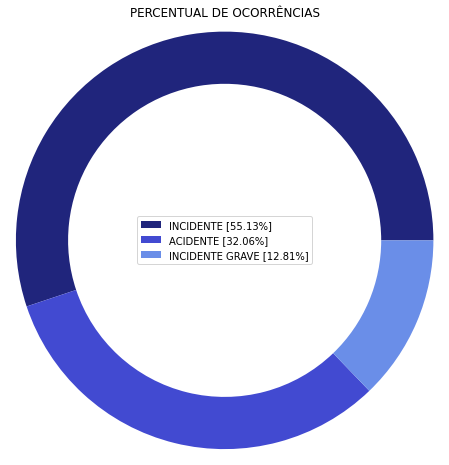

In [ ]:
# Criando a figura
f = plt.figure()

# Gráfico de Pizza
plt.pie(resultado['Nº Ocorrências'], labeldistance = 1, radius = 1.2, colors = ["#20257c", "#424ad1", "#6a8ee8"], wedgeprops = dict(width = 0.3))
plt.legend(labels = labels, loc = 'center', prop = {'size':'10'})
plt.title("PERCENTUAL DE OCORRÊNCIAS", loc = 'Center', fontdict = {'fontsize':12,'fontweight':12})
plt.show()

### **3. Número de recomendação por Estado**

In [ ]:
dados  #Imprimindo as primeiras e últimas linhas do dataframe principal;

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


In [ ]:
dados.replace(['***'], pd.NA, inplace=True) #Substituindo um registro por NA;

In [ ]:
#Agrupando as ocorrências por estado;
newdf = pd.DataFrame(dados.groupby(['ocorrencia_uf']).agg('sum'))  

In [ ]:
#Criando um subdataframe
#question3 = pd.DataFrame()

In [ ]:
# Atribuindo registros a coluna do novo df;
# Configurando a coluna Estado como indexador;

#question3['Estados'] = dados.ocorrencia_uf.unique()
#question3['Recomendacões'] = newdf['total_recomendacoes']
#question3.set_index('Estados')

In [ ]:
#Filtrando os registros por número de recomendação;
newdf['total_recomendacoes']

In [ ]:
#question3

In [ ]:
#Agrupando a soma dos registros por estado;
newdf = dados.groupby(['ocorrencia_uf']).agg('sum')

In [ ]:
# Deletando a coluna código da ocorrência;
newdf.drop(columns = ['codigo_ocorrencia'], inplace=True)

In [ ]:
#Imprimindo na tela
newdf

In [ ]:
# Ordenando o df por número de recomendação
ocorrenciaEstado = newdf.sort_values(by='total_recomendacoes', ascending=False)

In [ ]:
#Imprimindo na tela
ocorrenciaEstado

,total_recomendacoes
ocorrencia_uf,
SP,291
RS,153
PR,151
PA,150
BA,133
RJ,116
GO,108
AM,100
MG,88


In [ ]:
#Deletando um registro nulo;
ocorrenciaEstado.drop(ocorrenciaEstado.index[27], inplace=True)

In [ ]:
#Configurando as UF como indexador e colocando em uma lista;
indices3 = [i for i in ocorrenciaEstado.index]

In [ ]:
#Agrupando em lista o total das recomendações;
valores3 = ocorrenciaEstado.values.ravel().tolist()

In [ ]:
#Imprimindo na tela;
valores3

[291,
 153,
 151,
 150,
 133,
 116,
 108,
 100,
 88,
 56,
 53,
 50,
 40,
 39,
 31,
 29,
 28,
 24,
 23,
 18,
 15,
 14,
 13,
 11,
 7,
 5,
 2]

### Resposta da pergunta 03:

<function matplotlib.pyplot.show>

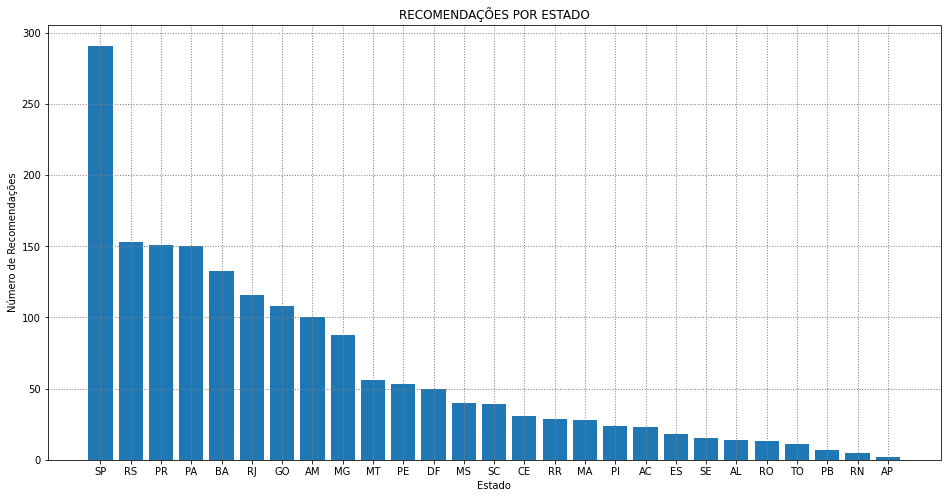

<Figure size 1152x576 with 0 Axes>

In [ ]:
# Visualização dos dados;

plt.title('RECOMENDAÇÕES POR ESTADO')
plt.xlabel('Estado')
plt.ylabel('Número de Recomendações')

plt.bar(indices3, valores3)
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.rcParams["figure.figsize"] = (16,8)
plt.figure()
plt.show

### **4.Número de ocorrências por estados**

In [ ]:
dados #Visualizando o dataframe principal;

In [ ]:
uf = dados.groupby('ocorrencia_uf') #Agrupando os dados por UF.

In [ ]:
uf.first() #Visualizando o agrupamento

In [ ]:
uf.get_group('SP') #Filtrando por São Paulo

In [ ]:
ocorrenciaEstado.index #Trazendo as UF como indexadores novamente;

In [ ]:
# Adicionando os Estados a uma lista;
a = []
for i in ocorrenciaEstado.index:
  a.append(i)

In [ ]:
a # Lista de Estados;

In [ ]:
b = [] # Lista vazia para receber a soma das ocorrências;

In [ ]:
#Adicionando a soma das ocorrências na lista;
for i in a:
  b.append(uf.get_group(i).shape[0])

In [ ]:
import seaborn as sns #Pacote de visualização de dados

In [ ]:
ocorrencia = pd.DataFrame() #Criando um novo dataframe

In [ ]:
ocorrencia['Estado'] = a #Adicionando a lista de estado a coluna do df;

In [ ]:
ocorrencia['Ocorrencias'] = b #Adicionando a lista de valores a coluna do df;

In [ ]:
# Ordenando o df;
num = ocorrencia.sort_values(by = 'Ocorrencias', ascending=False)


In [ ]:
#Visualizando as ocorrências
num.Ocorrencias

### Resposta da pergunta 04:

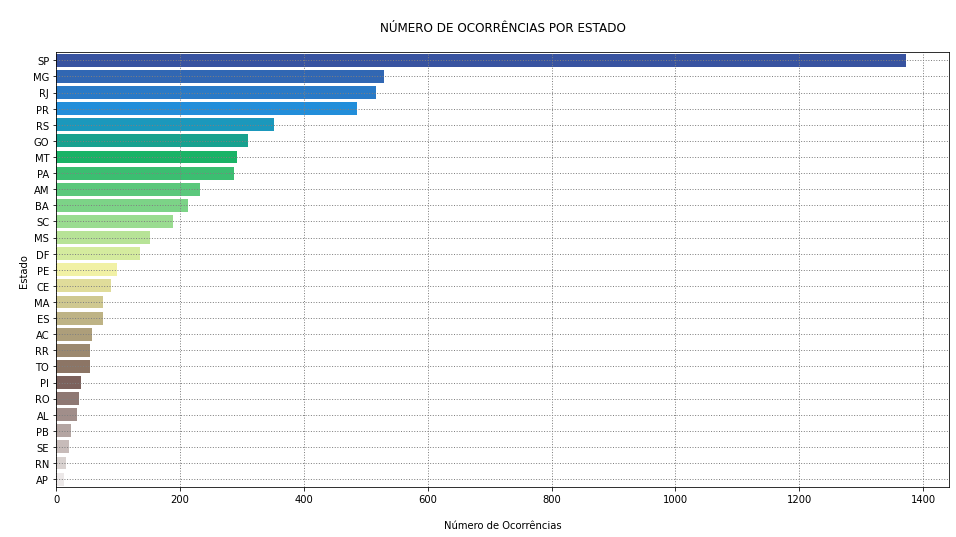

In [ ]:
#Visualização dos dados

plt.figure(figsize = (16,8))
sns.barplot(x = num.Ocorrencias , y = num.Estado, orient = "h", palette = "terrain")
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.ylabel('\nEstado')
plt.xlabel('\nNúmero de Ocorrências')
plt.title('\nNÚMERO DE OCORRÊNCIAS POR ESTADO\n')
plt.show()

### **5. Principais cidades com mais ocorrencias**

In [ ]:
dados #DF Principal

In [ ]:
city = dados.groupby('ocorrencia_cidade') #Agrupando os dados por cidade;

In [ ]:
city.first() #Visualizando os dados;

In [ ]:
cid = dados.ocorrencia_cidade #Extraindo a relação de cidades;

In [ ]:
cid #Visualizando a relação

In [ ]:
unics = [] #Lista para receber a relação de cidades

In [ ]:
# Adicionando as cidades a lista
contador = 0
for i in cid:
  contador = contador + 1
  unics.append(i)

In [ ]:
set(unics) #Visualizando a lista de cidades não repetidas;

In [ ]:
nomecidades = [] #Criando uma lista com a relação de cidades unicas;

In [ ]:
# Adicionando a cidades a lista (Sem repetição);
for i in set(unics):
  nomecidades.append(i)

In [ ]:
ocorrenciacidade = [] #Lista vazia para receber a soma das ocorrências;

In [ ]:
cd = dados.groupby('ocorrencia_cidade') #Agrupando por cidade;

In [ ]:
#Adicionando as ocorrências a lista
for i in nomecidades:
  ocorrenciacidade.append(cd.get_group(i).shape[0])

In [ ]:
principaiscidades = pd.DataFrame() #Criando um df;

In [ ]:
principaiscidades['Cidades'] = nomecidades #Atribuindo colunas;

In [ ]:
principaiscidades['Numero_Acidentes'] = ocorrenciacidade  #Atribuindo colunas;

In [ ]:
principaiscidades #Visualizando o df

,Cidades,Numero_Acidentes
0,RIO VERDE DE MATO GROSSO,1
1,PRESIDENTE BERNARDES,1
2,IVINHEMA,3
3,VARGEM BONITA,1
4,ITAPIRANGA,1
...,...,...
1094,IRAÍ DE MINAS,1
1095,BOM RETIRO,1
1096,MOZARLÂNDIA,1
1097,JAGUARIPE,1


In [ ]:
#Ordenando o df por ordem decrescente
ordenando = principaiscidades.sort_values(by = 'Numero_Acidentes', ascending=False)

In [ ]:
#Visualizando o TOP10 cidades com maiores ocorrências;
ordenando.Cidades.head(10)

In [ ]:
ordenando.index #Extraindo os index da top10 cidades com maiores ocorrências;

Int64Index([550, 735, 378, 213, 331, 108, 703, 956, 675, 789,
            ...
            670, 671, 673, 674, 285, 676, 677, 284, 282,   0],
           dtype='int64', length=1099)

In [ ]:
ordenando.head(10) #Visualizando as 10 cidades com maiores ocorrências;

,Cidades,Numero_Acidentes
550,RIO DE JANEIRO,321
735,SÃO PAULO,275
378,BELO HORIZONTE,188
213,GUARULHOS,153
331,CAMPINAS,150
108,GOIÂNIA,138
703,LONDRINA,137
956,BRASÍLIA,135
675,MANAUS,103
789,PORTO ALEGRE,99


### Resposta da pergunta 05:

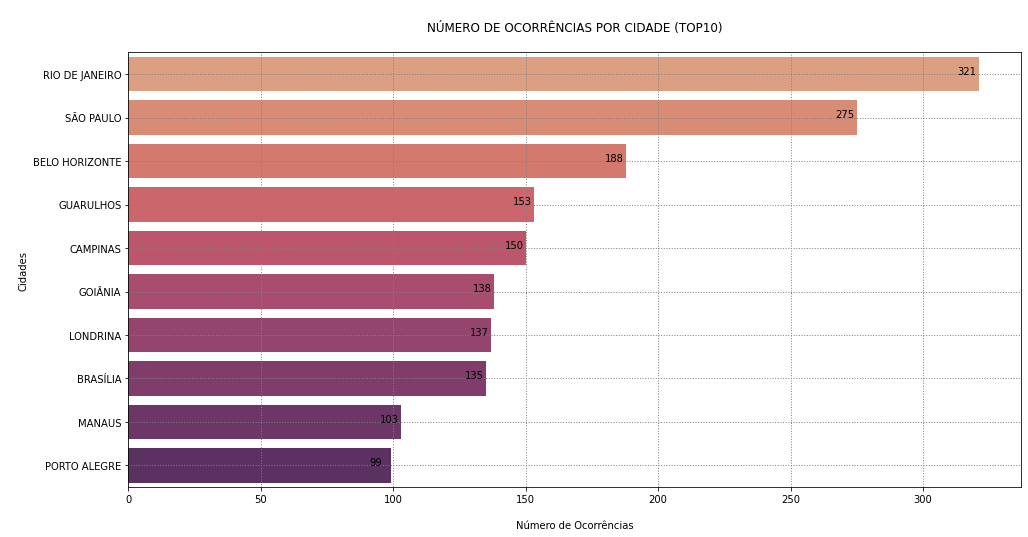

In [ ]:
#Visualização dos dados;

plt.figure(figsize = (16,8))
sns.barplot(x = ordenando.Numero_Acidentes.head(10) , y = ordenando.Cidades.head(10), orient = "h", palette = "flare")

for i in range(0,10):
    plt.text(ordenando.Numero_Acidentes[ordenando.index[i]]-8,
             i + 0.001,
             round(ordenando["Numero_Acidentes"][ordenando.index[i]],2))

plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.ylabel('\nCidades')
plt.xlabel('\nNúmero de Ocorrências')
plt.title('\nNÚMERO DE OCORRÊNCIAS POR CIDADE (TOP10)\n')
plt.show()

## **Conclusão:**

...